<a href="https://colab.research.google.com/github/meligurevich/IAAA1/blob/main/TP1_AA1_regresionlinealGurevich_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 AA1

**Melisa Sabrina Gurevich**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de Regresión Lineal y Análisis de Importancia de Variables**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.
---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets/?Task=Regression&skip=0&take=10&sort=desc&orderBy=NumHits&search=  
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas (1 target, 3 o más features).  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

# 📊 Dataset Utilizado: Métricas de Publicaciones en Facebook

El dataset seleccionado contiene información sobre el rendimiento de 500 publicaciones realizadas por una página de negocios en Facebook a lo largo del año 2014.

Este conjunto de datos resulta muy valioso para analizar cómo diferentes características de una publicación (tipo, horario, promoción, etc.) influyen en el alcance y la interacción de los usuarios.

Entre las variables más destacadas se encuentran:

👍 Page total likes: cantidad de seguidores al momento de la publicación

📝 Type: tipo de contenido (foto, video, enlace, etc.)

🗂️ Category: categoría del post

📅 Post month / day / hour: fecha y hora de publicación

💰 Paid: si fue una publicación promocionada

👁️ Lifetime Post Total Reach: cantidad de usuarios alcanzados

📈 Lifetime Post Total Impressions: total de impresiones generadas

🤝 Lifetime Engaged Users: usuarios que interactuaron con el contenido

🛠️ Lifetime Post Consumers / Consumptions: número y tipo de acciones realizadas

❤️💬🔁 Lifetime Likes, Comments y Shares: interacciones específicas del post

**Este dataset combina variables numéricas continuas y categóricas, lo que lo convierte en una excelente base para aplicar modelos predictivos y evaluar la importancia de cada variable en el éxito de una publicación.**

In [8]:
import altair as alt
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conectar Google Drive al notebook de Colab
from google.colab import drive
drive.mount('/content/drive')

# Cargar el conjunto de datos correctamente
df = pd.read_csv('/content/drive/MyDrive/IAAAGUREVICH/datasetFacebook.csv', sep=';')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Visualizar las muestras del dataset
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [10]:
# Visualizamos la infomación del dataset
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime


## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - **Pregunta clave**: ¿Qué relaciones lineales preliminares observan?  


## Resolución:

# 🔍 Análisis exploratorio (previo al modelado)


In [11]:
# Visualizamos los parámetros estadísticos del dataset
df.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


In [12]:
# Seleccionamos las columnas numéricas y calculaamos la media
medias = df.select_dtypes(include=['int64', 'float64']).mean()

# Mostramos la media de cada columna
print("Media para cada columna numérica del dataset:\n")
for columna, valor in medias.items():
    print(f"{columna}: {valor:.2f}")

Media para cada columna numérica del dataset:

Page total likes: 123194.18
Category: 1.88
Post Month: 7.04
Post Weekday: 4.15
Post Hour: 7.84
Paid: 0.28
Lifetime Post Total Reach: 13903.36
Lifetime Post Total Impressions: 29585.95
Lifetime Engaged Users: 920.34
Lifetime Post Consumers: 798.77
Lifetime Post Consumptions: 1415.13
Lifetime Post Impressions by people who have liked your Page: 16766.38
Lifetime Post reach by people who like your Page: 6585.49
Lifetime People who have liked your Page and engaged with your post: 609.99
comment: 7.48
like: 177.95
share: 27.27
Total Interactions: 212.12


# 📊 Media de las variables numéricas del dataset Facebook Metrics

📣 **Page total likes:** 123,194.18ù.

En promedio, la página tenía más de 123 mil seguidores, lo que indica una base sólida de audiencia.

**🗂️ Category: 1.88**

La categoría promedio se encuentra entre 1 y 2, lo que puede representar distintos tipos de publicaciones (según la codificación del dataset).

**📅 Post Month: 7.04**

La mayoría de las publicaciones se realizaron alrededor del mes de julio.

**📆 Post Weekday: 4.15**

En promedio, las publicaciones se realizaron hacia el jueves, lo que sugiere foco en días laborales.

**🕖 Post Hour: 7.84**

Las publicaciones fueron hechas principalmente por la mañana, cerca de las 8:00 hs.

**💰 Paid: 0.28**

Solo el 28% de los posts fueron promocionados, lo que indica una estrategia mayormente orgánica.

**👥 Lifetime Post Total Reach: 13,903.36**

Cada publicación llegó en promedio a unas 13.900 personas únicas.

**👁️ Lifetime Post Total Impressions: 29,585.95**

Las publicaciones generaron en promedio 29.586 visualizaciones, incluyendo repeticiones.

**🤝 Lifetime Engaged Users: 920.34**

Cerca de 920 personas interactuaron con cada post en promedio.

**🛠️ Lifetime Post Consumers: 798.77**

Alrededor de 799 usuarios realizaron acciones de consumo sobre el contenido (clics, visualizaciones).

**⚙️ Lifetime Post Consumptions: 1,415.13**

Cada post generó aproximadamente 1.415 acciones totales (clics, vistas, etc.).

**🔁 Impressions from fans: 16,766.38**

Unas 16.766 impresiones provinieron de personas que ya seguían la página.

**📣 Reach from fans: 6,585.49**

Cada publicación alcanzó a 6.585 seguidores existentes, en promedio.

**🙋‍♀️ Fans engaged: 609.99**

Unas 610 personas que ya seguían la página interactuaron con el post.

**💬 Comments: 7.48**

Cada post recibió en promedio 7 a 8 comentarios.

**👍 Likes: 177.95**

Cada publicación obtuvo aproximadamente 178 “me gusta”.

**🔗 Shares: 27.27**

Cada contenido fue compartido unas 27 veces, lo cual ayuda al alcance orgánico.

**📈 Total Interactions: 212.12**

Sumando likes, comentarios y compartidos, cada publicación generó alrededor de 212 interacciones totales.

# 🔹 Distribución de variables

Analizamos cómo se distribuyen las variables numéricas del dataset usando histogramas con curvas KDE (estimación de densidad).

###Histograma para ver la distribucion de las variables

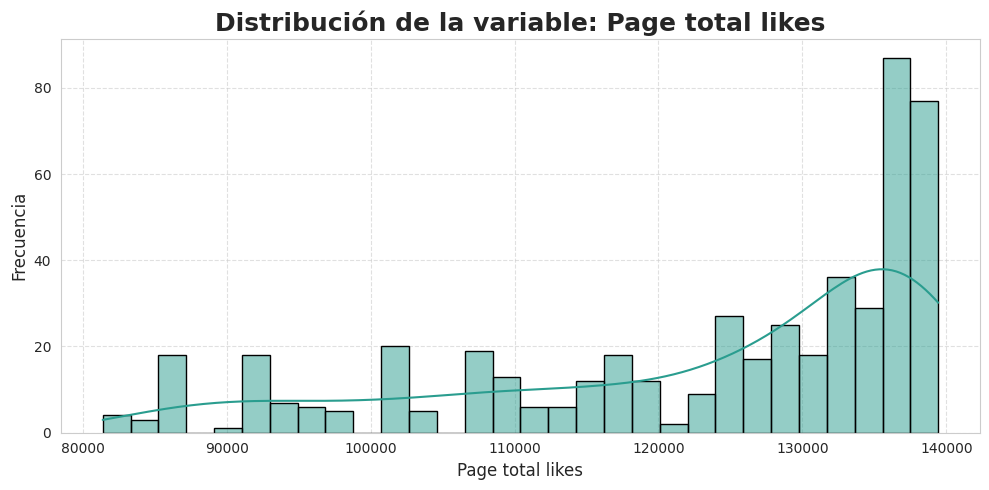

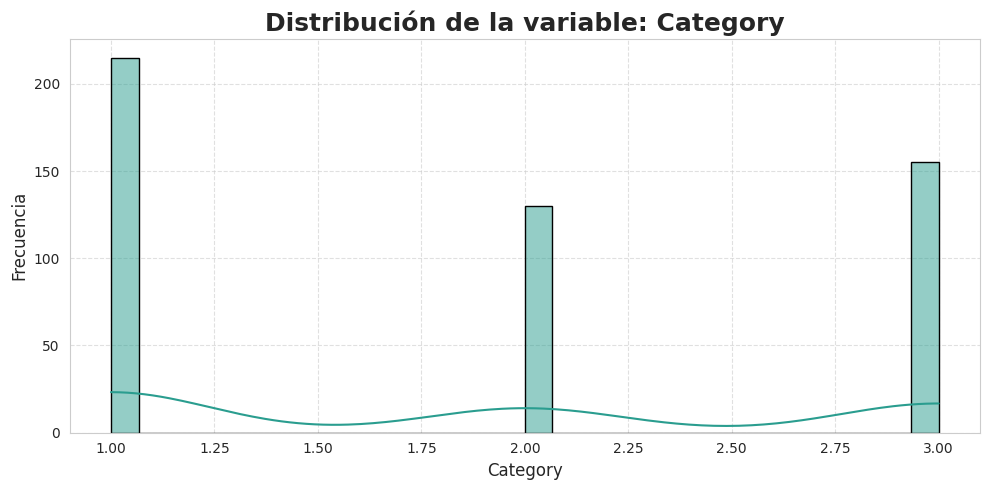

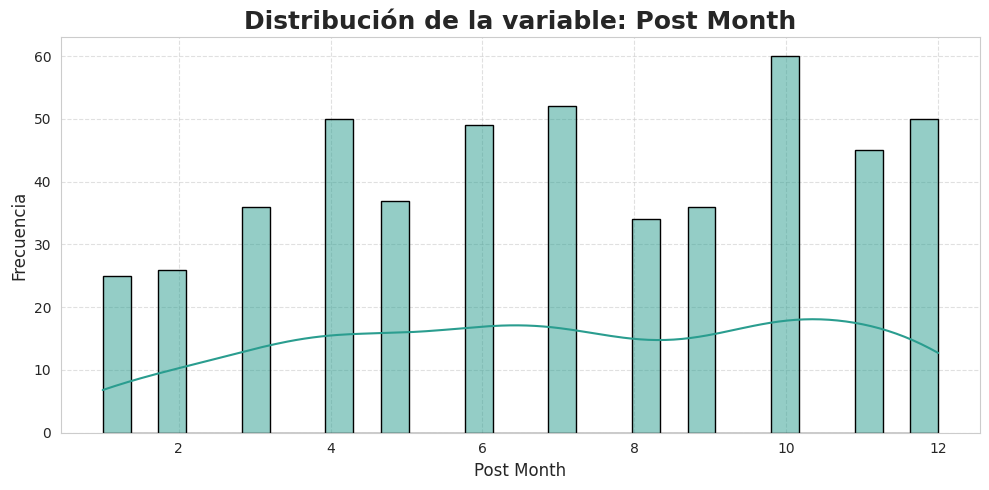

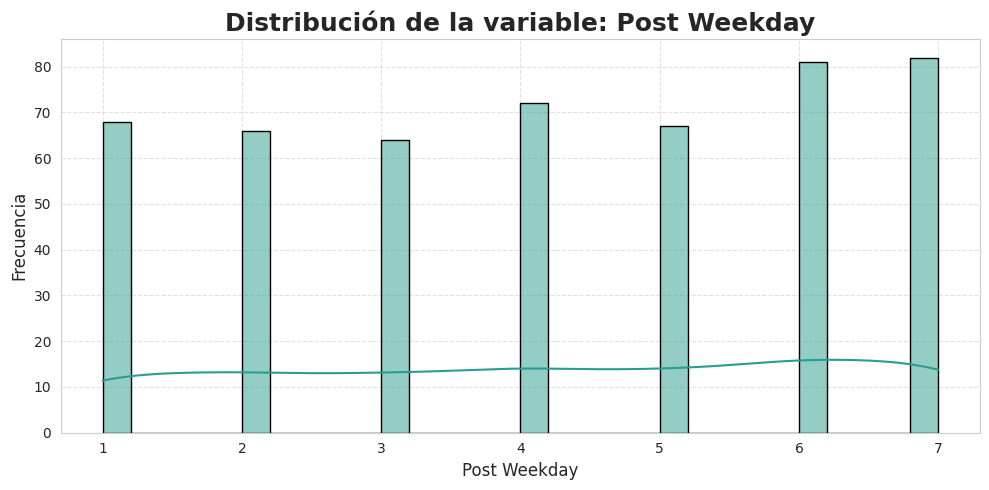

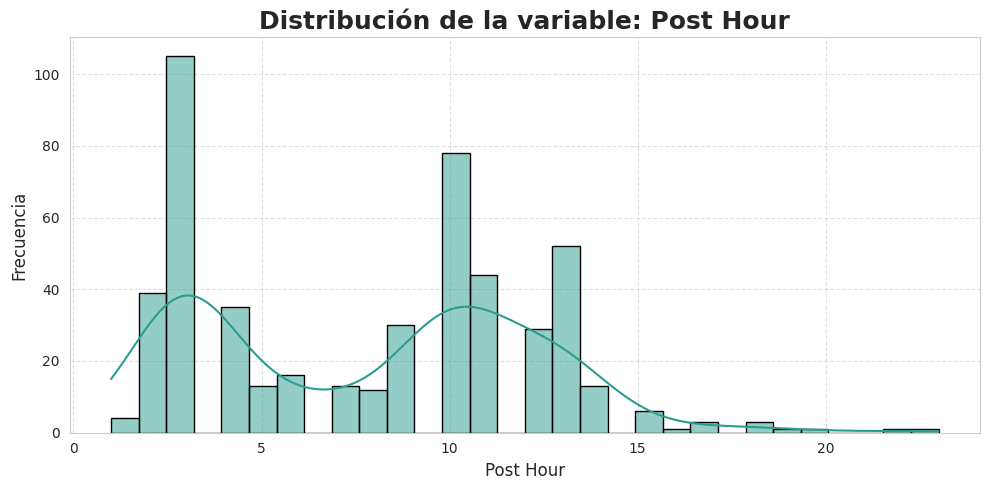

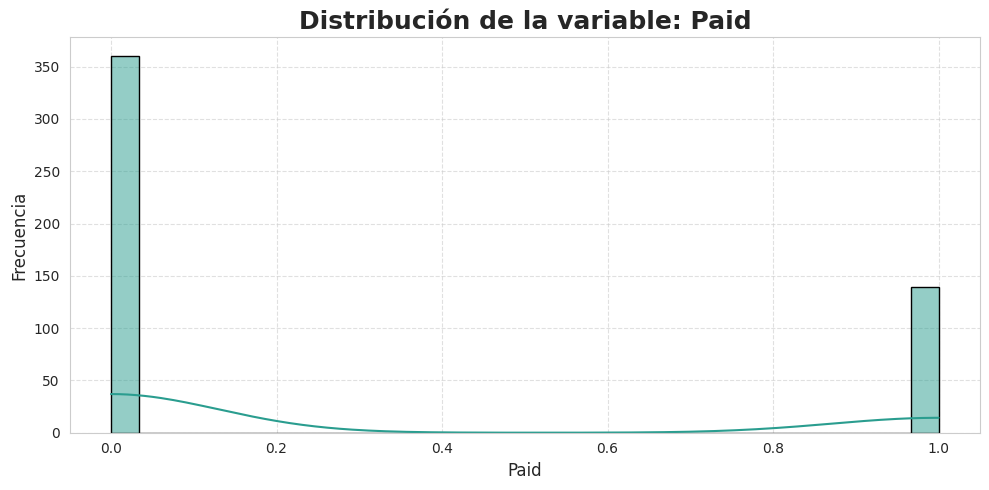

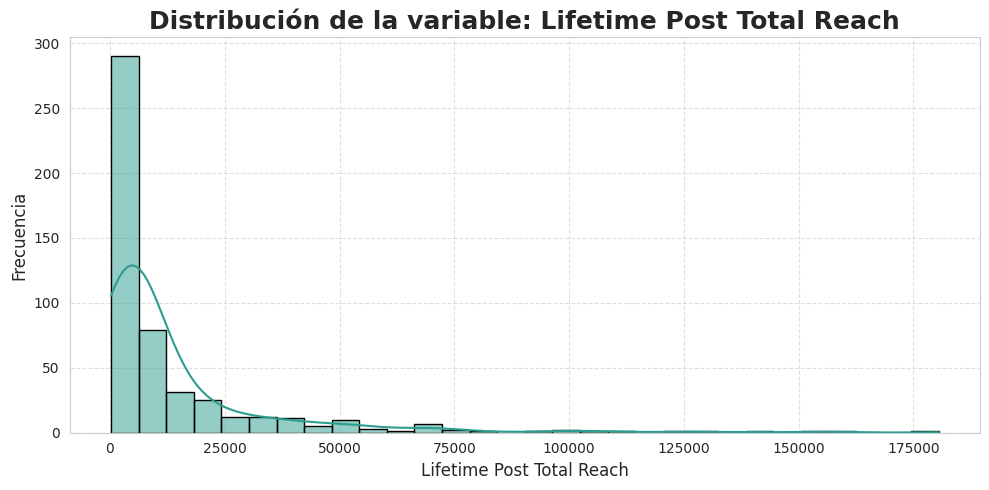

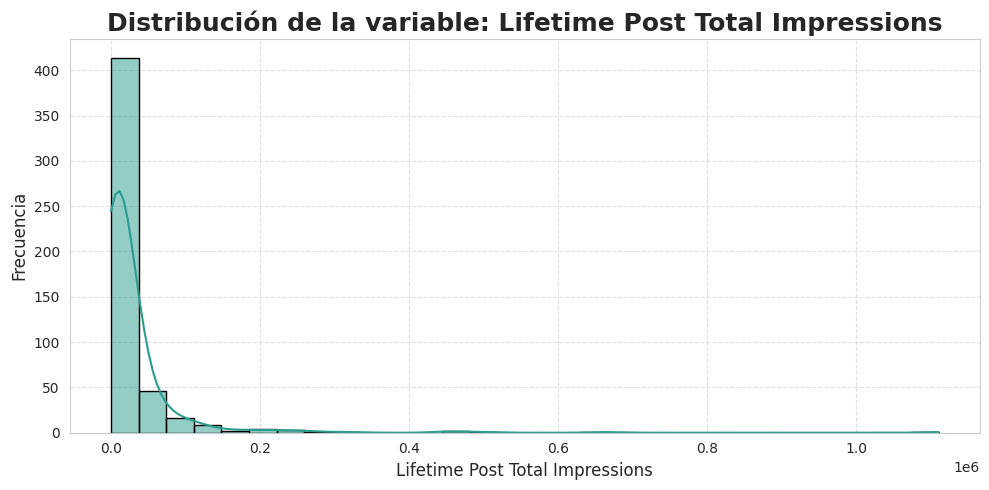

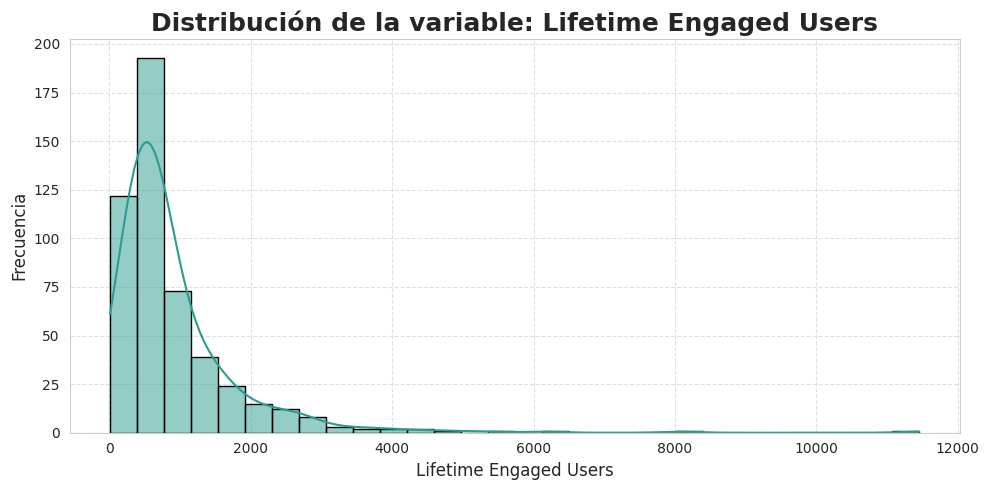

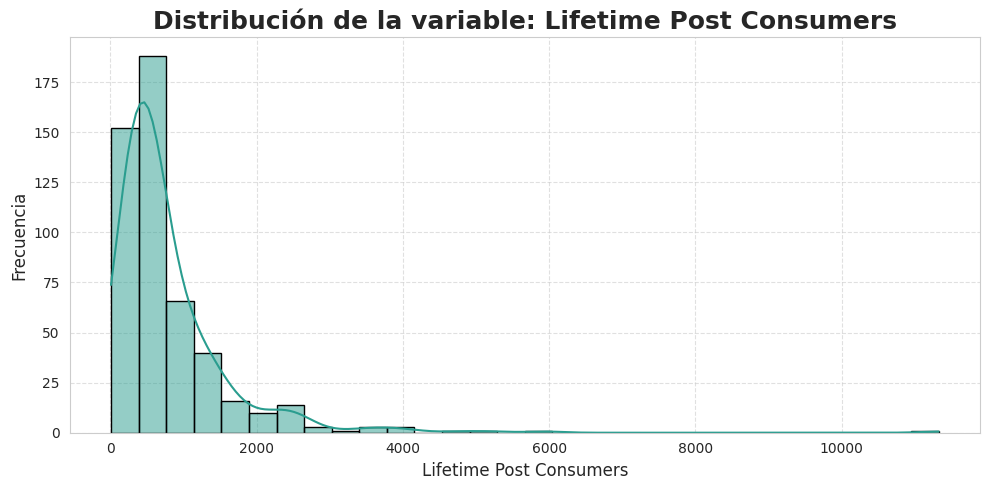

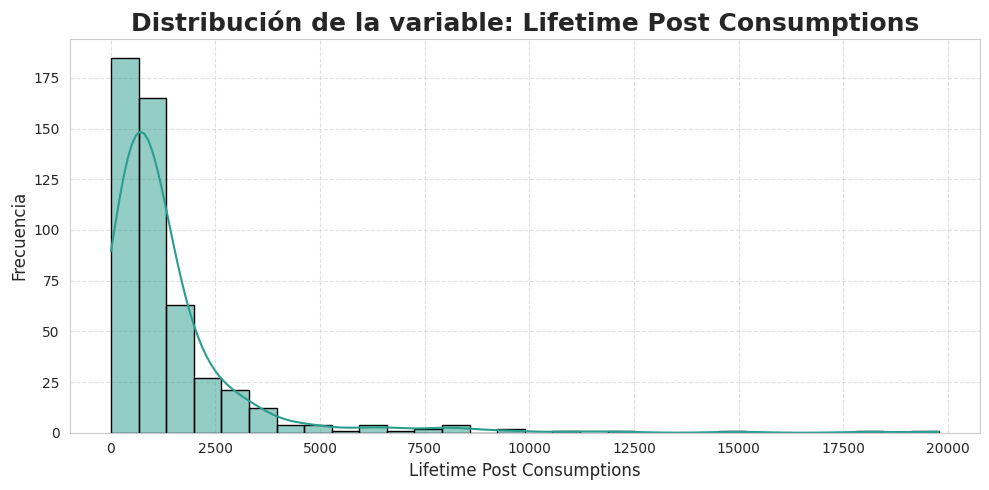

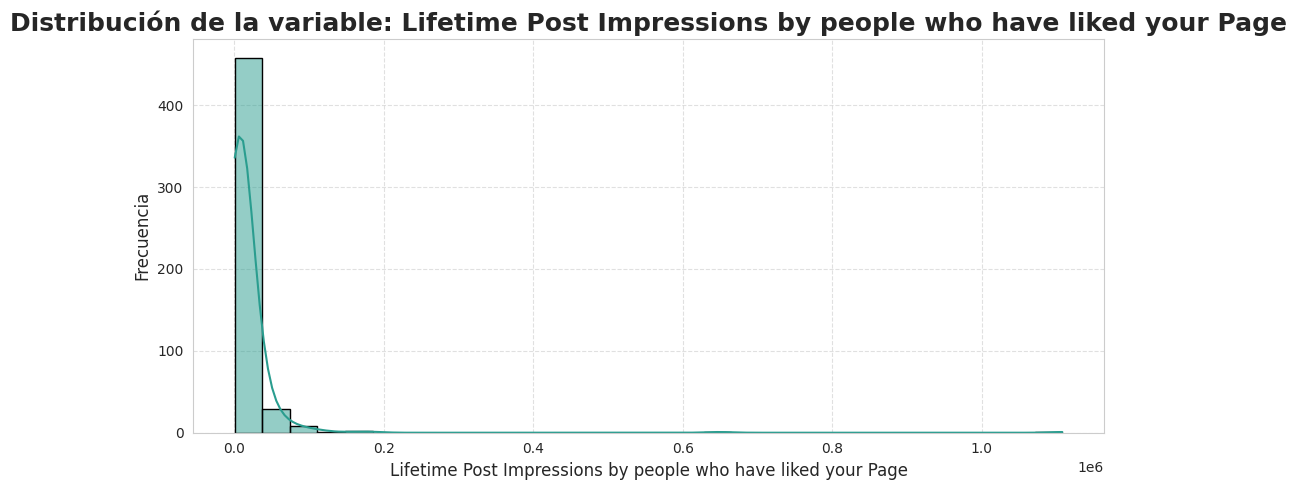

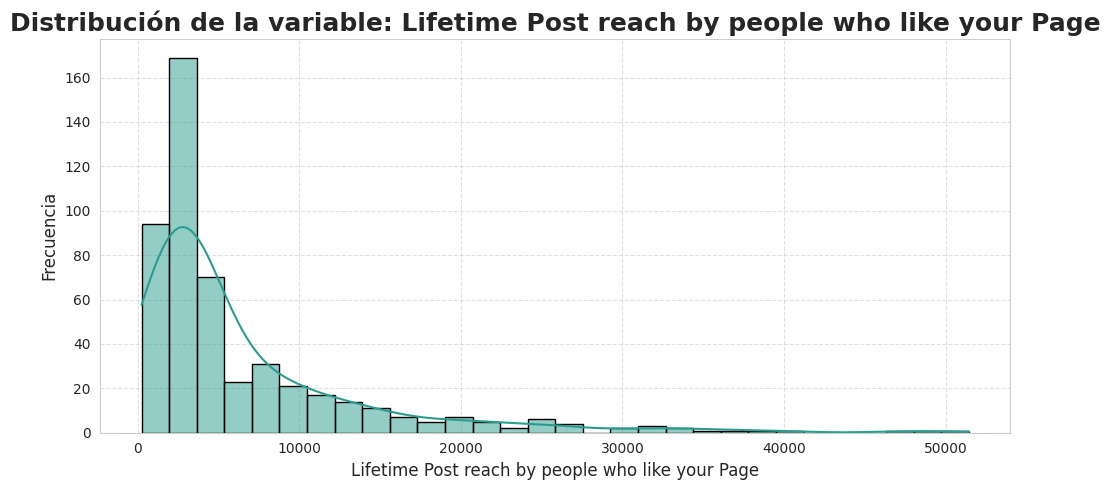

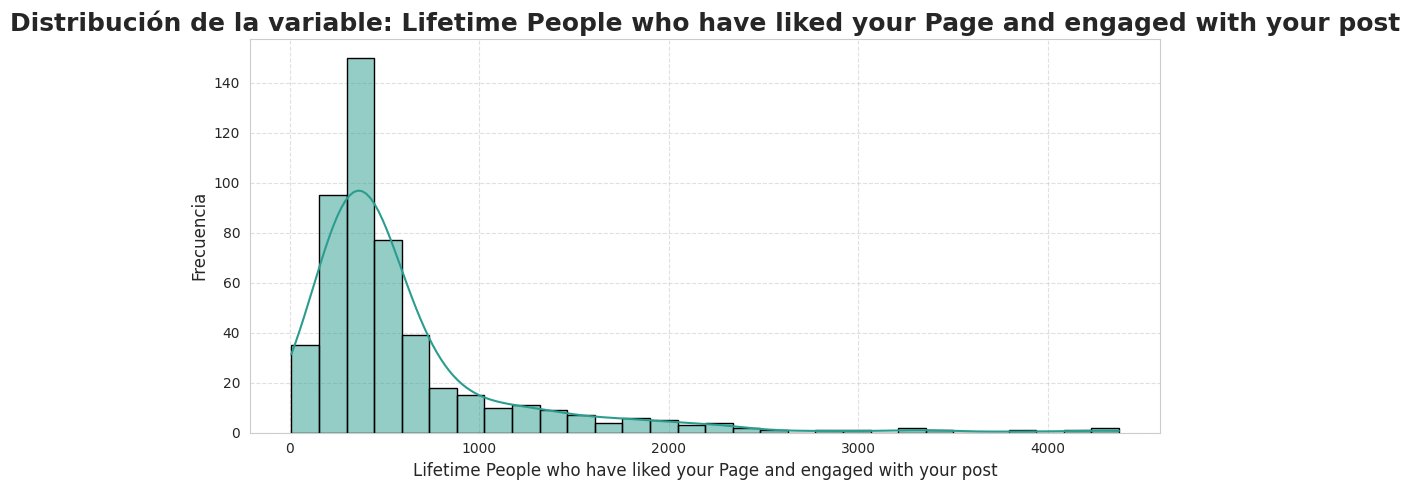

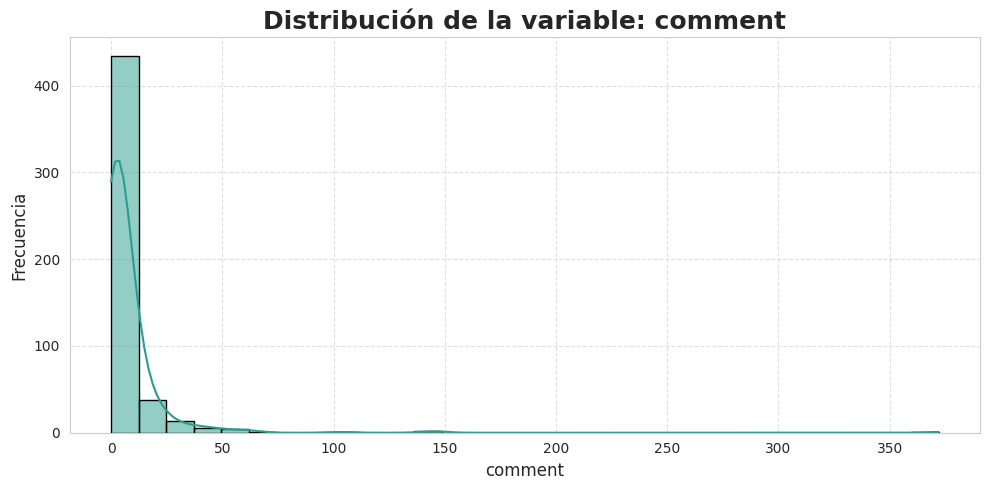

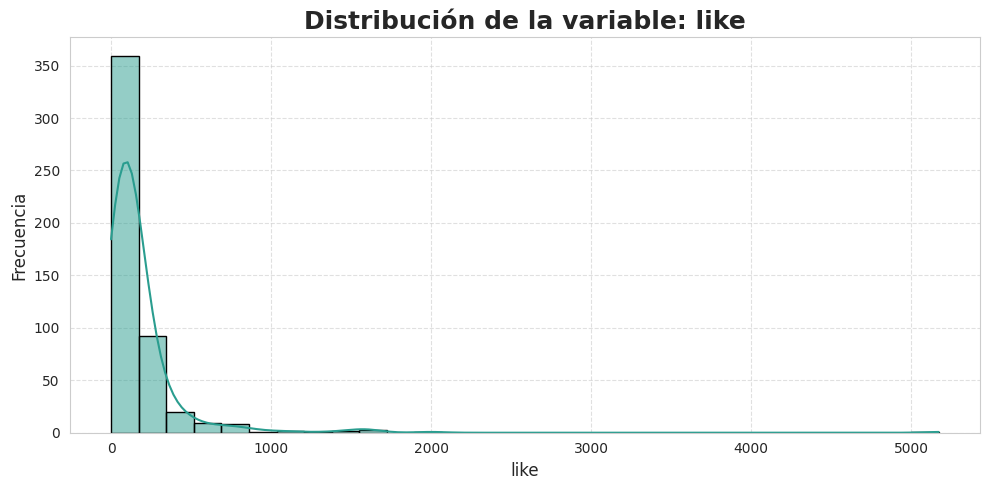

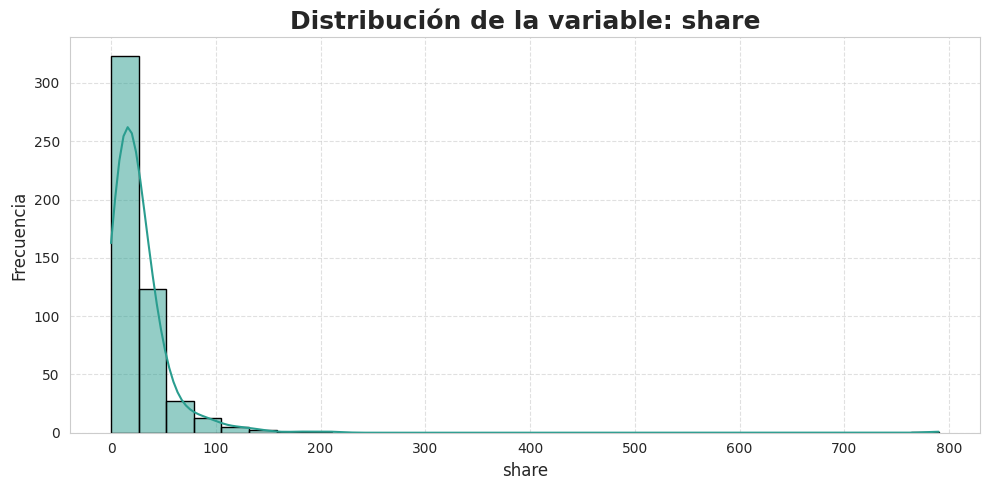

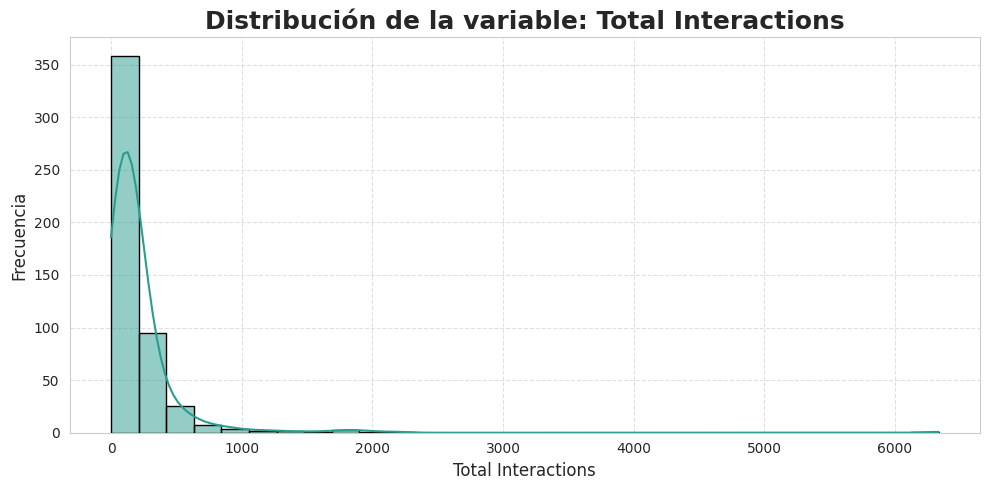

In [15]:
# Estilo visual general
sns.set_style("whitegrid")
plt.rcParams.update({
    'axes.titlesize': 16,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

# Histograma + KDE personalizado
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30, color="#2a9d8f", edgecolor='black')
    plt.title(f"Distribución de la variable: {col}", fontsize=18, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frecuencia", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

Los histogramas con curvas KDE permiten visualizar la distribución de frecuencia de una variable junto con una estimación suave de su densidad, facilitando la identificación de patrones, asimetrías y concentraciones de datos.

- Gráfico 1: La mayoría de las páginas tienen entre 130.000 y 140.000 "Me gusta", lo que indica que esa es la cantidad más común en el dataset.

- Gráfico 2: La categoría 1 es la más utilizada en las publicaciones, seguida por las categorías 3 y 2, aunque con menor frecuencia.

- Gráfico 3: Las publicaciones se distribuyen durante todo el año, con picos en los meses de octubre, diciembre y julio, lo que sugiere mayor actividad en esos períodos.

- Gráfico 4: Las publicaciones se reparten de forma bastante equilibrada durante la semana, con una ligera preferencia por sábado (6) y domingo (7).

- Gráfico 5: La mayoría de las publicaciones se realizan entre las 3 y las 11 de la mañana, con picos claros alrededor de las 3:00 y 10:00 hs, lo que indica una estrategia centrada en la franja matutina.

- Gráfico 6: La gran mayoría de las publicaciones no fueron promocionadas (valor 0), mientras que una minoría fueron pagas (valor 1), lo que indica una estrategia predominantemente orgánica.

- Gráfico 7: La mayoría de las publicaciones alcanzaron a menos de 20.000 personas, con unos pocos casos excepcionales que llegaron a valores muy altos, lo que indica una distribución muy sesgada a la derecha.

- Gráfico 8: La mayoría de las publicaciones generaron menos de 50.000 impresiones, mientras que unos pocos casos excepcionales superaron ampliamente ese valor, lo que evidencia una distribución fuertemente sesgada a la derecha.

- Gráfico 9: La mayoría de las publicaciones tienen menos de 1.000 usuarios que interactúan, aunque hay algunos casos con valores mucho mayores, lo que indica una alta concentración en valores bajos y presencia de outliers.

- Gráfico 10: La mayoría de las publicaciones fueron consumidas por menos de 1.000 usuarios, aunque existen algunos casos con cifras significativamente más altas, lo que revela una distribución sesgada a la derecha con valores atípicos.

- Gráfico 11: La mayoría de las publicaciones tuvieron menos de 2.000 consumos, aunque hay algunos picos altos. La distribución está claramente sesgada a la derecha.

- Gráfico 12: Predominan valores muy bajos de impresiones por parte de seguidores, con algunos outliers extremos que superan ampliamente el promedio.

- Gráfico 13: La mayoría de los posts alcanzaron a menos de 10.000 seguidores, con una distribución sesgada a la derecha.

- Gráfico 14: La mayor parte de las publicaciones logró que menos de 1.000 seguidores interactúen, aunque existen valores más altos poco frecuentes.

- Gráfico 15: La mayoría de los posts recibió menos de 20 comentarios, con unos pocos posts que obtuvieron más de 100, lo cual genera una larga cola derecha.

- Gráfico 16: La distribución muestra que la mayoría de las publicaciones recibió menos de 300 “me gusta”, aunque existen algunos picos que superan los 1.000.

- Gráfico 17: En general, las publicaciones fueron compartidas menos de 100 veces, y solo en casos excepcionales se superó esa cifra.

- Gráfico 18: La mayoría de los posts generaron menos de 500 interacciones totales, con una distribución muy asimétrica y outliers altos.

# 🔹Visualización de outliers con boxplots

Estos te muestran de forma visual qué variables presentan valores extremos.

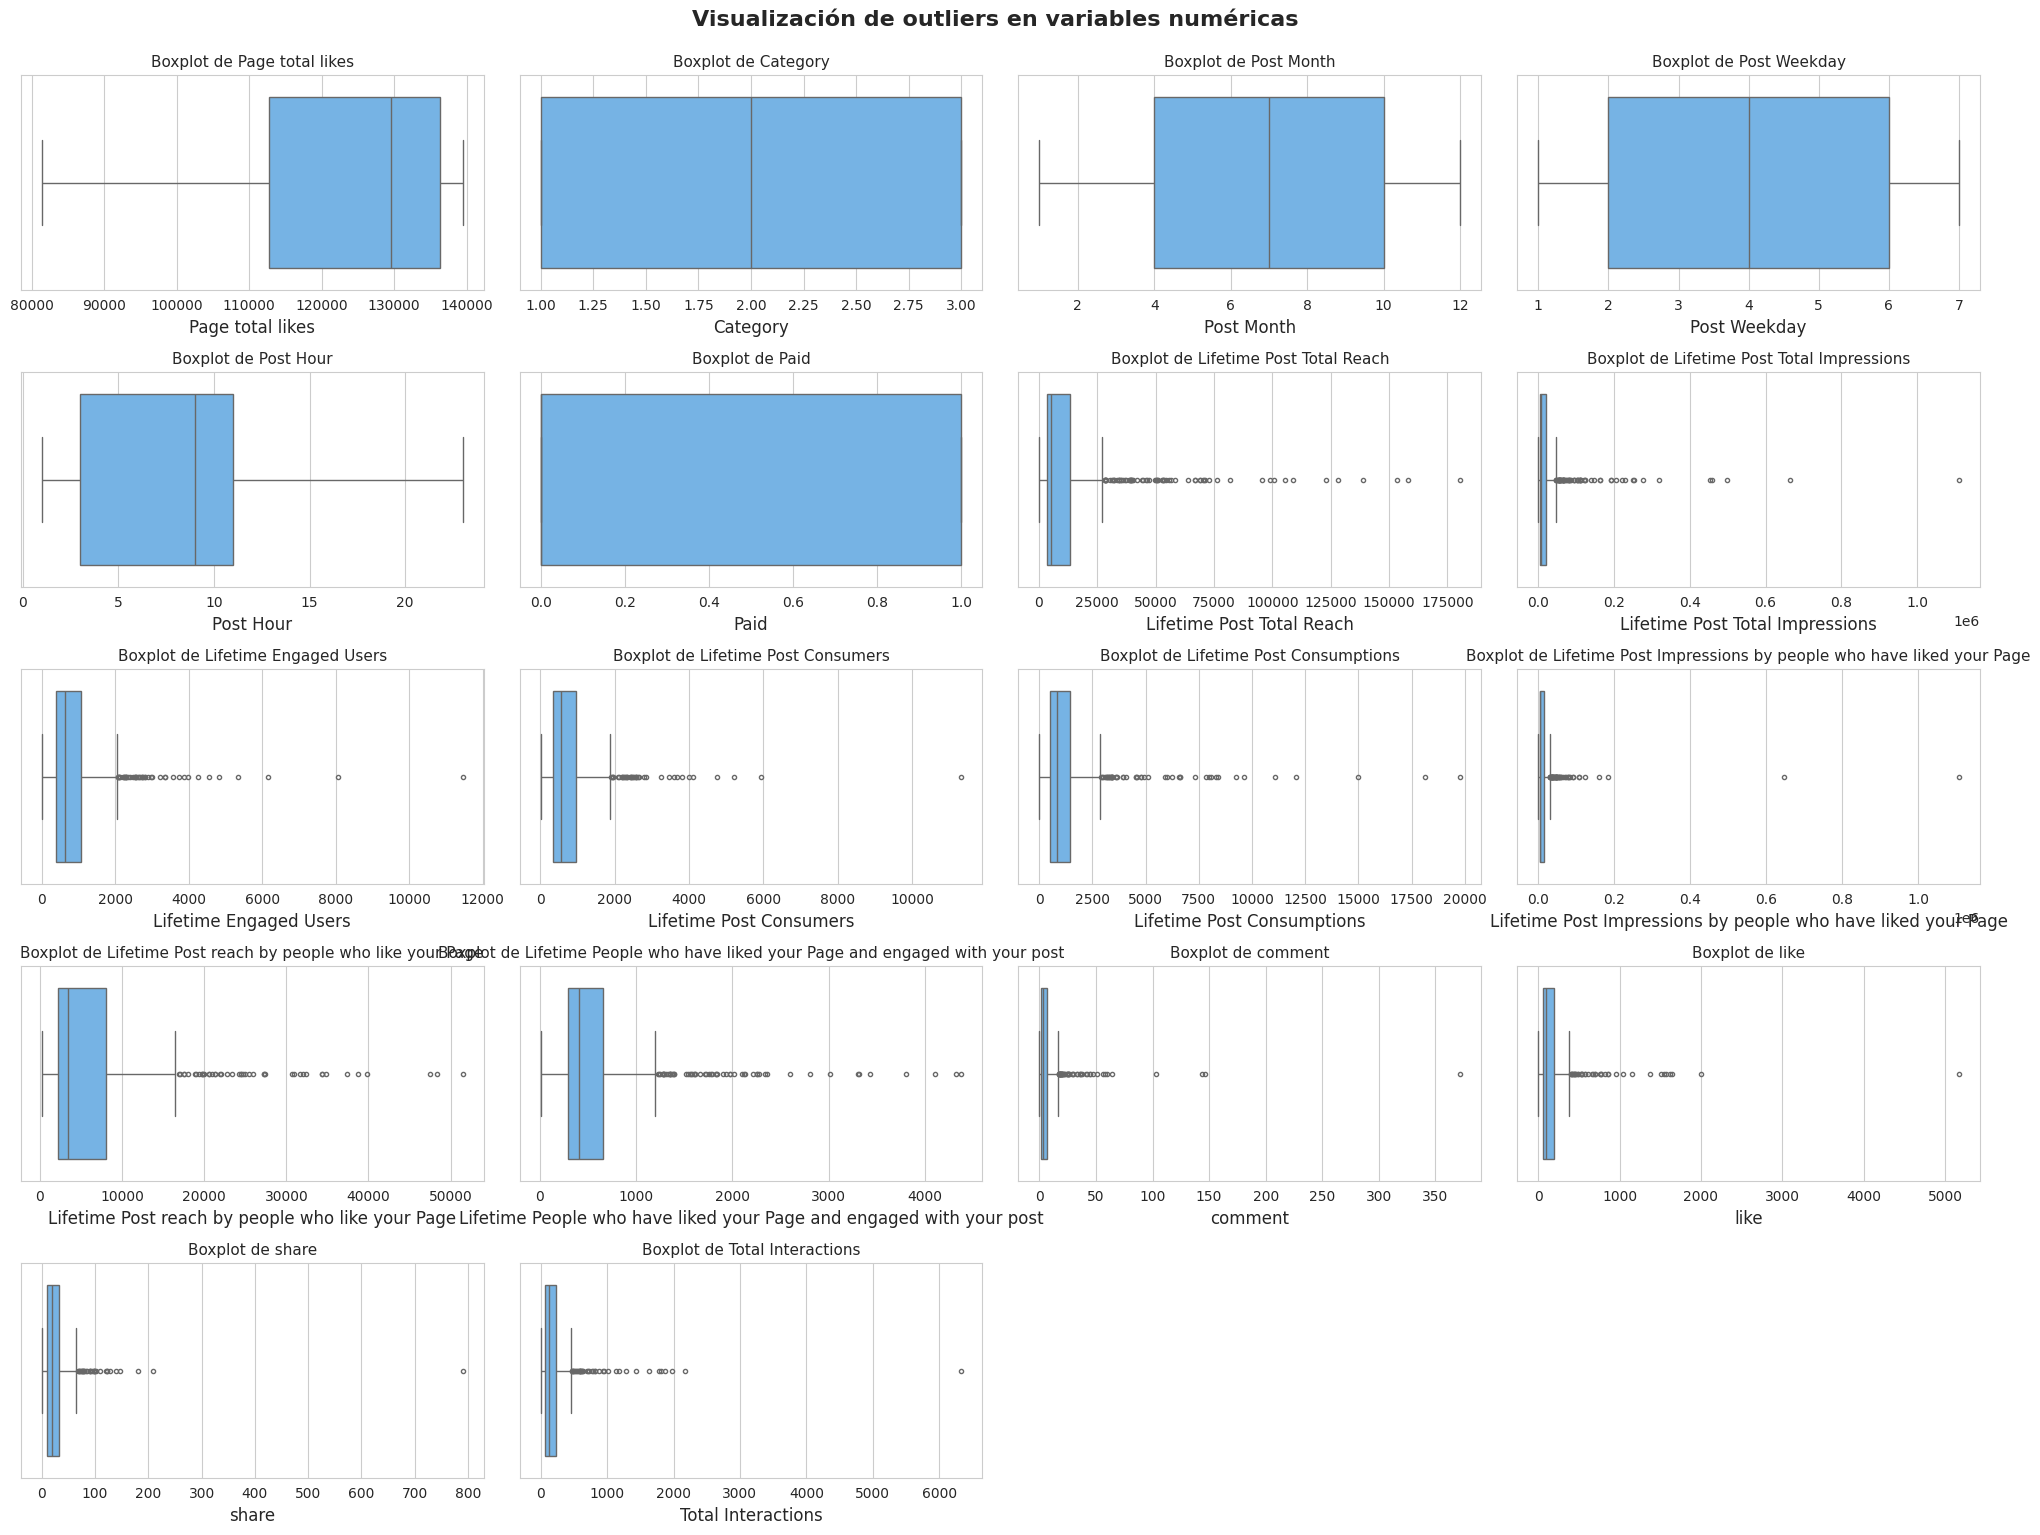

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Seleccionamos columnas numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Configuramos de layout
n = len(num_cols)
cols = 4  # Número de columnas en la grilla
rows = math.ceil(n / cols)

plt.figure(figsize=(cols*5, rows*3))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df[col], color="#64b5f6", fliersize=3)
    plt.title(f"Boxplot de {col}", fontsize=11)
    plt.xlabel(col)
    plt.tight_layout()

plt.suptitle("Visualización de outliers en variables numéricas", fontsize=16, fontweight='bold', y=1.02)
plt.show()

Los boxplots de las variables numéricas del dataset de métricas de Facebook permiten identificar visualmente la presencia de outliers (valores atípicos). Se observa que variables como "Lifetime Post Total Reach", "Lifetime Post Total Impressions", "Lifetime Post Impressions by people who have liked your Page" y "Lifetime Post Consumptions" presentan una gran cantidad de valores extremos hacia la derecha, lo que sugiere una distribución sesgada positiva. También se identifican outliers en las interacciones como "comment", "like", "share" y "Total Interactions", lo cual es esperable dado que algunas publicaciones pueden haber tenido mucho más impacto que otras.

Por otro lado, variables como "Category", "Post Month", "Post Weekday", "Paid" o "Post Hour" muestran distribuciones más uniformes o discretas, con menor presencia de valores atípicos. En general, este análisis de outliers es útil para detectar variaciones significativas entre publicaciones y podría guiar decisiones como la normalización de datos o el tratamiento de valores extremos antes de aplicar un modelo de regresión o clasificación.

# 🔹Gráficos de dispersión (scatterplots) entre features y target

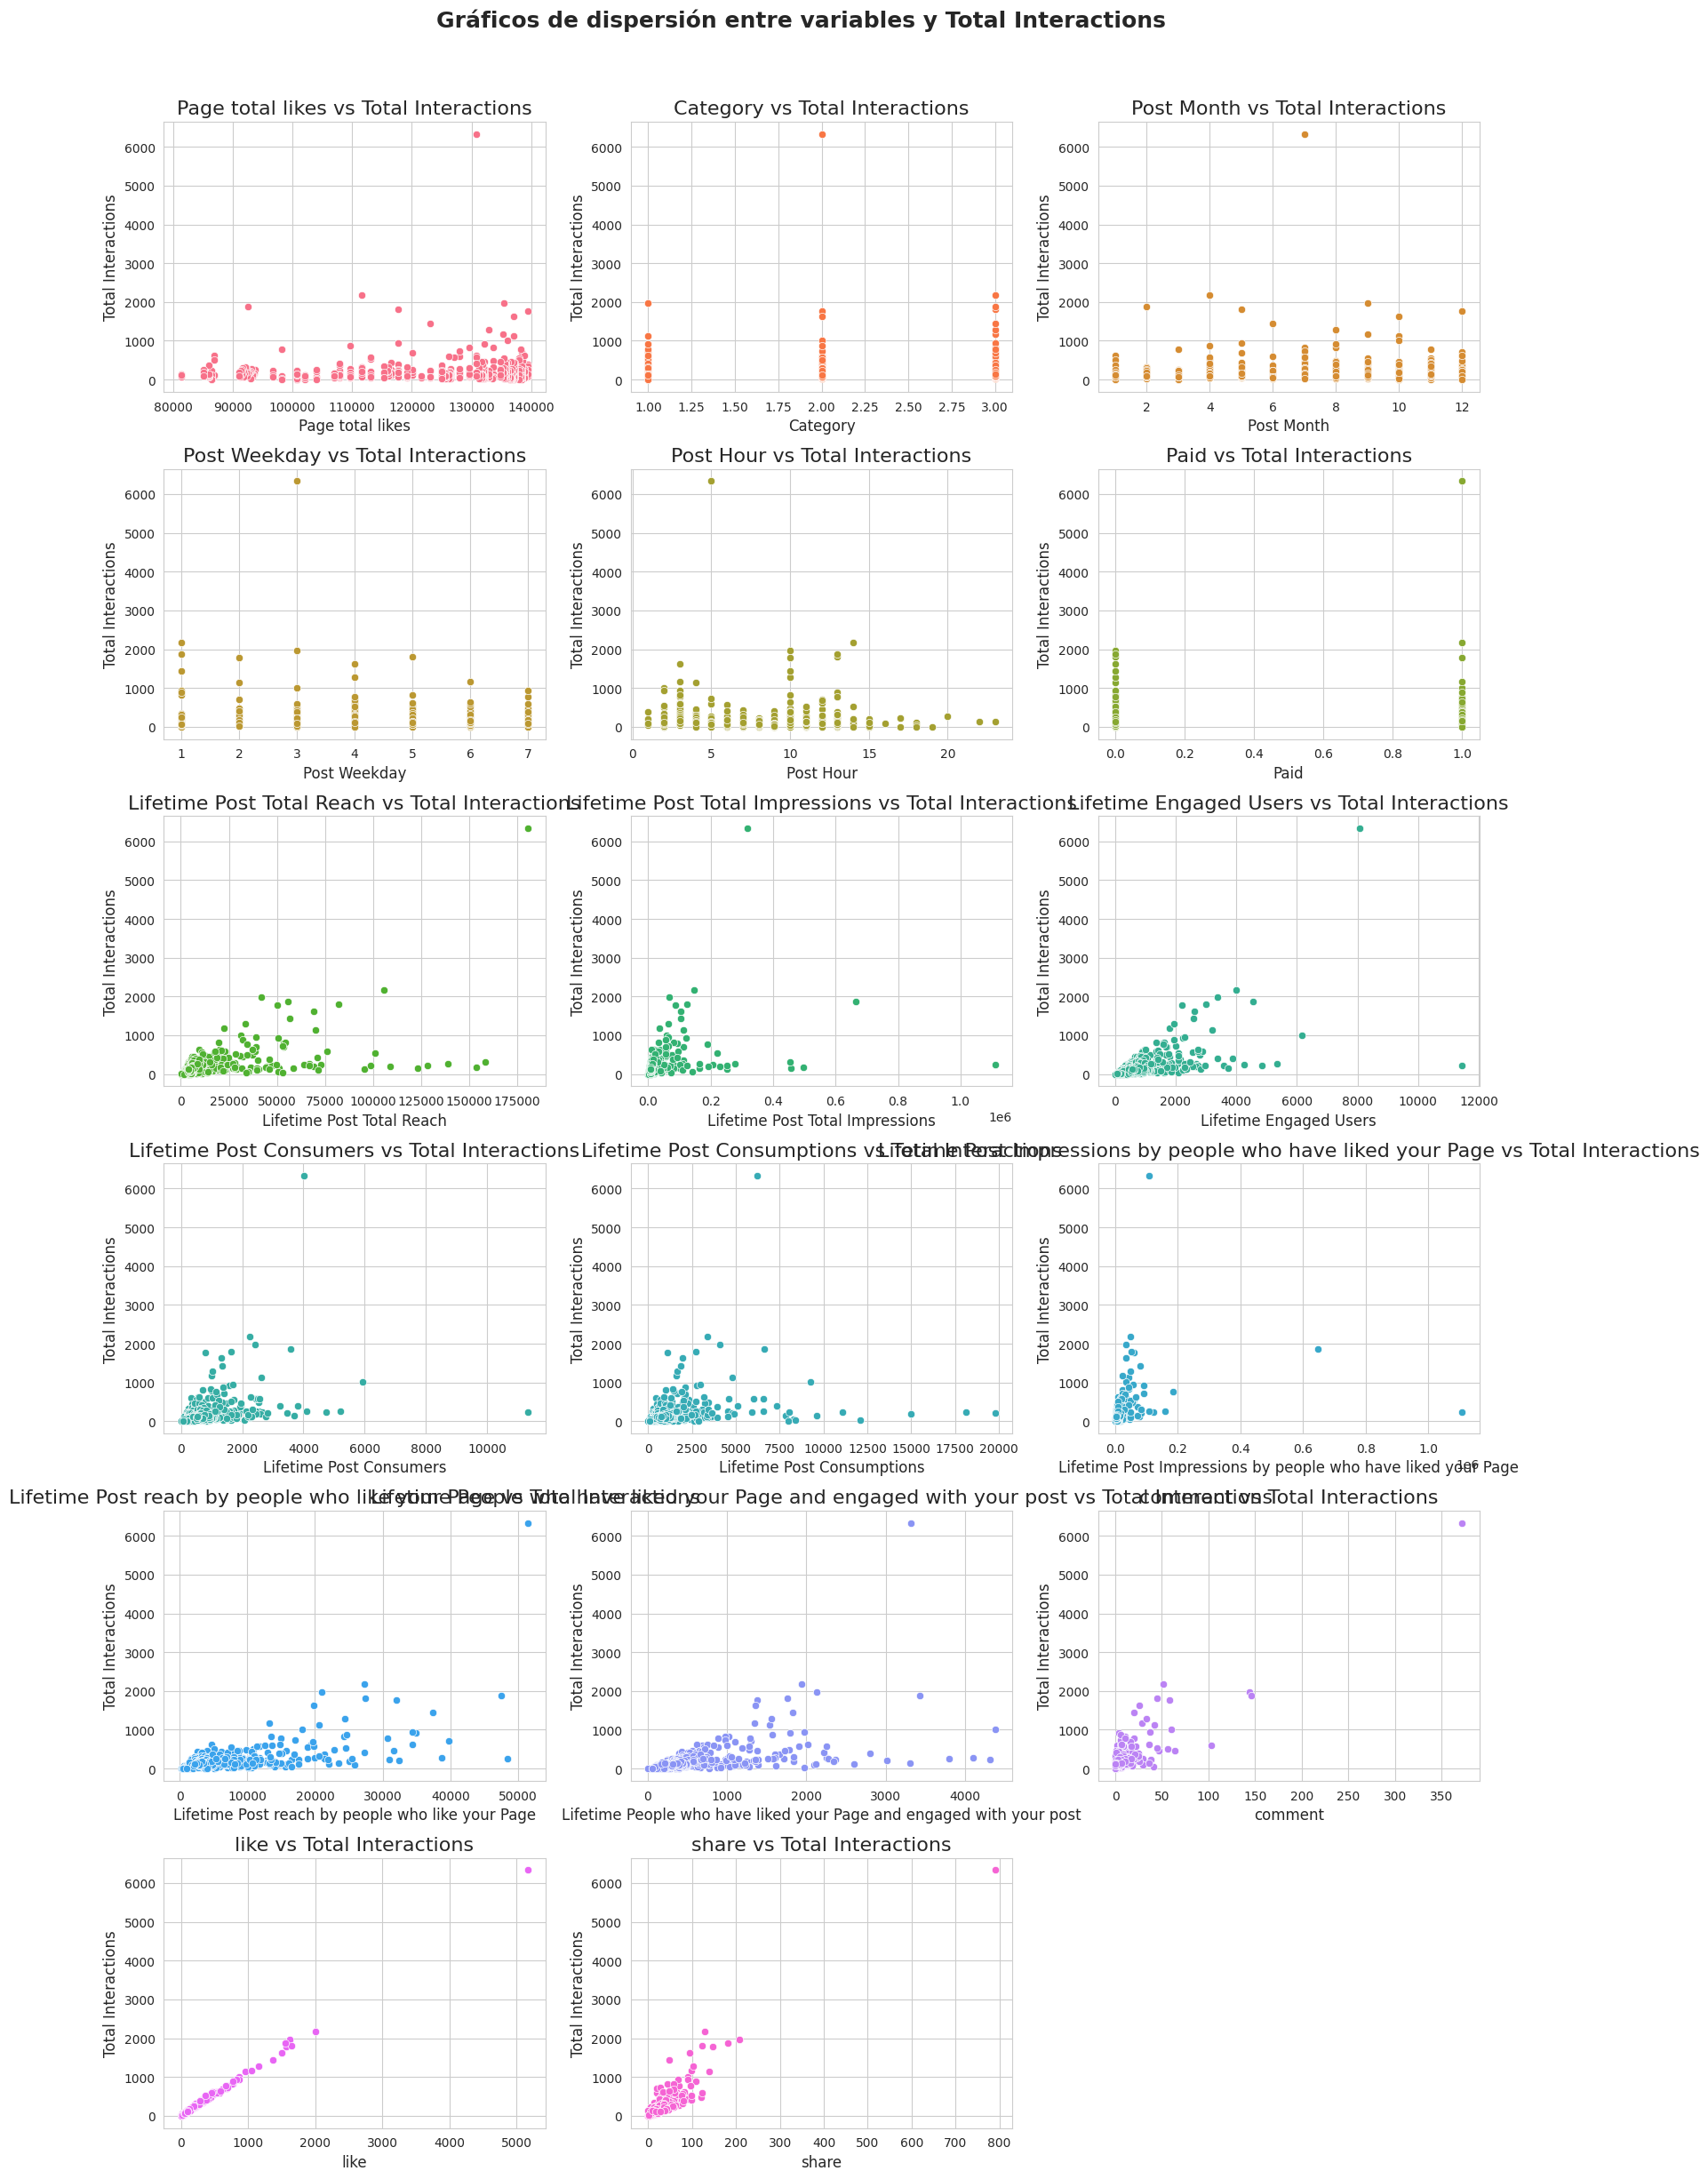

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de colores personalizados
colores = sns.color_palette("husl", len(df.select_dtypes(include=['int64', 'float64']).columns))

# Definimos variables numéricas excluyendo el target
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
features = [col for col in num_cols if col != 'Total Interactions']

# Creamos subplots de 3 columnas por fila
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

# Generamos gráficos
for i, col in enumerate(features):
    sns.scatterplot(data=df, x=col, y='Total Interactions', ax=axes[i], color=colores[i])
    axes[i].set_title(f'{col} vs Total Interactions')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Total Interactions')

# Eliminamos ejes vacíos si los hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Título general
plt.suptitle('Gráficos de dispersión entre variables y Total Interactions',
             fontsize=18, y=1.02, weight='bold')

plt.tight_layout()
plt.show()

Los gráficos de dispersión revelan que variables como los "likes", "shares" y "comments" presentan relaciones positivas y bastante lineales con las "Total Interactions", lo que indica que estas métricas de participación contribuyen directamente al total de interacciones en los posts. En particular, el número de "likes" muestra una tendencia clara y consistente, sugiriendo una fuerte correlación con la variable objetivo. Otras variables como "Lifetime People who liked your Page and engaged with your post" también presentan una asociación positiva, aunque con mayor dispersión, lo que sugiere que hay otros factores adicionales que podrían estar influyendo en las interacciones totales.

Por otro lado, variables como "Post Month", "Post Hour", "Paid" o "Post Weekday" no evidencian una relación clara con las interacciones totales. En estos casos, los puntos están dispersos sin una tendencia visible, lo que podría indicar una débil correlación o una relación más compleja no lineal. Las variables de alcance e impresiones también muestran cierta correlación, aunque más difusa, probablemente por la presencia de outliers o escalas muy amplias. En resumen, las variables relacionadas con la interacción directa del usuario (likes, shares, comments) parecen ser más determinantes para predecir las interacciones totales que las características de calendario o pago del post.

📈 **Conclusión**

En base al análisis exploratorio realizado mediante histogramas, boxplots y gráficos de dispersión, se observa que varias variables presentan distribuciones asimétricas y con presencia de outliers, especialmente aquellas relacionadas al alcance, impresiones y consumos, lo cual podría afectar la precisión de modelos sensibles a valores extremos. Además, los gráficos de dispersión muestran relaciones lineales positivas destacadas entre las variables de engagement (likes, shares, comments, consumos, usuarios comprometidos) y Total Interactions, lo que sugiere que estas variables son potencialmente buenas predictoras para un modelo de regresión lineal.

En contraste, variables como Paid, Post Hour o Post Weekday presentan distribuciones más uniformes o categóricas, sin una relación clara con el target, lo que indica un aporte posiblemente bajo en un modelo de regresión lineal simple, aunque podrían considerarse en modelos más complejos. En resumen, el análisis exploratorio brinda una base sólida para la selección de variables relevantes y advierte la necesidad de tratar outliers y escalas antes de entrenar el modelo.



---



## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Escalen las features (p.ej., StandardScaler) para comparar coeficientes después.  
   - Dividan en train/test (70-30 o 80-20).  

## Resolución:

# 🔹 Limpieza: missing values y outliers

In [17]:
df.isnull().sum()

,0
Page total likes,0
Type,0
Category,0
Post Month,0
Post Weekday,0
Post Hour,0
Paid,1
Lifetime Post Total Reach,0
Lifetime Post Total Impressions,0
Lifetime Engaged Users,0


In [18]:
# Imputamos valores faltantes con la mediana
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    if df[col].isnull().sum() > 0:
        mediana = df[col].median()
        df[col].fillna(mediana, inplace=True)

<ipython-input-18-79a634e00f13>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mediana, inplace=True)


Usamos la mediana para imputar valores faltantes en variables numéricas, ya que los boxplots mostraron presencia de outliers en muchas de ellas.

# 🔹 Eliminación de features (descartadas y justificación)

- Type es una variable categórica con muy poca variación y puede generar ruido.
- Page total likes y variables de fecha/hora (Post Month, Post Hour, etc.) mostraron baja correlación y escasa relación lineal con Total Interactions.

In [19]:
# Descartamos columnas que no aportan valor predictivo o son redundantes
df.drop(['Type', 'Page total likes', 'Post Month', 'Post Weekday', 'Post Hour'], axis=1, inplace=True)

# 🔹 Uso de variables categóricas

Sólo usamos la variable categórica Category ya que tiene pocos valores y es significativa en algunos casos.

In [20]:
# Transformamos 'Category' (categórica con pocos valores) usando One-Hot Encoding
df = pd.get_dummies(df, columns=['Category'], drop_first=True)

# 🔹 Escalado de las features

Esto se hace para que la regresion lineal funcione bien y los coeficientes sean comparables. Usamos StandardScaler para escalar todas las features con media 0 y varianza 1. Esto es fundamental para interpretar los coeficientes en una regresión lineal.

In [21]:
from sklearn.preprocessing import StandardScaler

# Separamos features y target
X = df.drop('Total Interactions', axis=1)
y = df['Total Interactions']

# Escalamos las features numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 🔹 División en conjunto de entrenamiento y prueba (train/test)

Dividimos los datos en un 80% para entrenamiento y 20% para test, garantizando aleatoriedad reproducible con random_state=42.

In [22]:
from sklearn.model_selection import train_test_split

# Dividimos 80% entrenamiento, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print('Tamaño del conjunto de entrenamiento:', X_train.shape)
print('Tamaño del conjunto de prueba:', X_test.shape)

Tamaño del conjunto de entrenamiento: (400, 14)
Tamaño del conjunto de prueba: (100, 14)


Se dividieron los datos en un 80% para entrenamiento (400 registros) y un 20% para prueba (100 registros), utilizando las 14 variables predictoras obtenidas tras el preprocesamiento. Esta división permitió que el modelo aprenda con la mayor parte de los datos y se evalúe con información nueva, asegurando una evaluación equilibrada. Además, se usó random_state=42 para garantizar la reproducibilidad de los resultados en futuros experimentos.



---






## 4. **Regresión Lineal**  
   - Ajusten un modelo de regresión lineal (usando `sklearn.linear_model.LinearRegression`).  
   - Obtengan:  
     - Coeficientes (pesos) del modelo.  
     - Evaluar métricas en el set de entrenamiento y en el de testeo: **R²**, MSE (error cuadrático medio), MAE.  


In [23]:
# Importamos las librerías necesarias para crear el modelo y medir su rendimiento
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Creamos un objeto del modelo de regresión lineal
modelo = LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

LinearRegression()

Estas bibliotecas nos permiten crear el modelo de regresión lineal y calcular métricas como R², MSE y MAE.

## 🔹Evaluamos las metricas en el set de entrenamiento y testeo

In [24]:
#Importamos las funciones para evaluar el rendimiento del modelo
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#Usa el modelo ya entrenado para hacer predicciones sobre los datos de X_train y las guarda en la variable
y_train_pred=modelo.predict(X_train)
#Tambien usa el modelo ya entrenado para hacer predicciones sobre el X_test.
y_test_pred=modelo.predict(X_test)

#Imprimimos los resultados del entrenamiento:
print('Entrenamiento:')
#Coeficiente de Determinacion R2 comparando los resultados del entrenamiento, con las predicciones que el modelo hizo.
print('R2:',r2_score(y_train,y_train_pred))
#Calcula el Error Cuadratico Medio, comparando y_train y y_train_pred
print('MSE:',mean_squared_error(y_train,y_train_pred))
print('MAE:',mean_absolute_error(y_train,y_train_pred))

print('Testeo:')
print('R2:',r2_score(y_test,y_test_pred))
print('MSE:',mean_squared_error(y_test,y_test_pred))
print('MAE:',mean_absolute_error(y_test,y_test_pred))

Entrenamiento:
R2: 0.9997798753684598
MSE: 36.64395660709016
MAE: 1.1636629117260144
Testeo:
R2: 0.9999226503330042
MSE: 4.190305054672285
MAE: 0.9480640133386516


Con esto podemos evaluar mejor la precisión del modelo:

- MAE te dice el error promedio en unidades reales.
- MSE penaliza errores grandes.
- R² te indica qué porcentaje de la varianza está explicada por el modelo.

Resultados del Modelo de Regresión Lineal

🔹 Conjunto de Entrenamiento (Train):

R² = 0.9998 → El modelo explica el 99.98% de la variabilidad de los datos de entrenamiento. El ajuste es casi perfecto.

MSE = 36.64 → El error cuadrático medio es bajo, lo que indica que el modelo comete pocos errores grandes.

MAE = 1.16 → En promedio, el modelo se equivoca por poco más de una unidad. Excelente precisión.

🔹 Conjunto de Prueba (Test):

R² = 0.9999 → El modelo generaliza extremadamente bien, explicando el 99.99% de la variabilidad en datos no vistos.

MSE = 4.19 → El error cuadrático medio es incluso menor que en entrenamiento, lo cual es inusual pero positivo.

MAE = 0.95 → El error absoluto promedio también es bajo, confirmando que el modelo predice con gran exactitud.

**Conclusión**

El modelo muestra un ajuste excelente tanto en entrenamiento como en prueba.
No hay indicios de sobreajuste (overfitting) ni pérdida de generalización.
Este modelo es altamente confiable para predecir la variable objetivo (PRP) a partir de las características de entrada.


## 5. **Importancia de Variables**  
   - Analicen los **coeficientes** del modelo:  
     - Valores absolutos altos → mayor impacto en el target.  
     - Signo: Relación positiva/negativa con el target.  
   - Comparen la magnitud de los coeficientes **escalados** (si usaron features en distintas unidades).  
   - **5.1. Opcional**:
     Otra forma es "desordenar" un feature y ver cómo empeora el modelo. Si al desordenarlo el error aumenta mucho, ese feature era importante. Usen métodos como:  
     - **Permutation Importance** (de sklearn) para validar importancia. Más info en https://scikit-learn.org/stable/modules/permutation_importance.html



Top 5 coeficientes del modelo:
                   Variable  Coeficiente
10                     like   316.271351
11                    share    42.718232
9                   comment    21.938499
3    Lifetime Engaged Users    19.600062
4   Lifetime Post Consumers   -17.611805

Top 5 variables por Permutation Importance:
                   Variable  Importancia Permutación
10                     like                 1.600342
11                    share                 0.016902
3    Lifetime Engaged Users                 0.007555
4   Lifetime Post Consumers                 0.006831
9                   comment                 0.001885


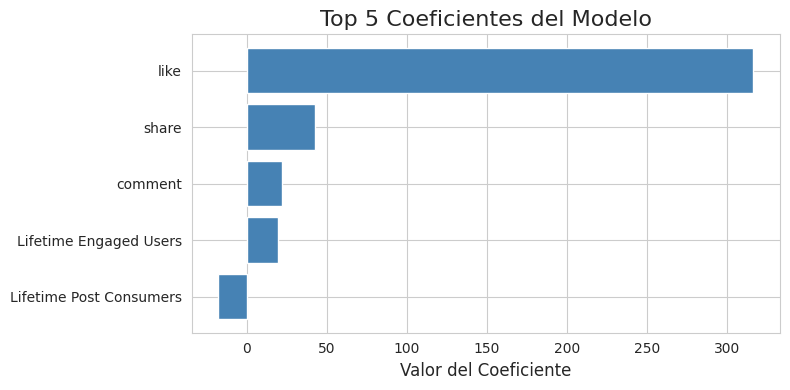

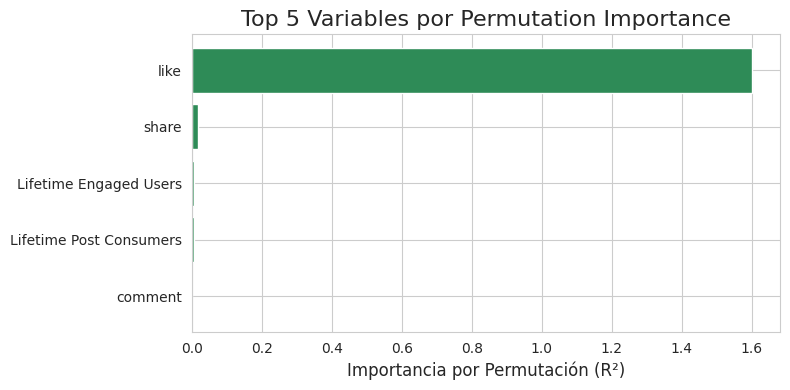

In [30]:
from sklearn.inspection import permutation_importance

#Coeficientes del modelo
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo.coef_
})
coef_df['Importancia (absoluta)'] = coef_df['Coeficiente'].abs()
coef_df = coef_df.sort_values(by='Importancia (absoluta)', ascending=False).head(5)

# Permutation Importance
perm = permutation_importance(modelo, X_test, y_test, n_repeats=30, random_state=42)
perm_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia Permutación': perm.importances_mean,
    'Desvío Permutación': perm.importances_std
}).sort_values(by='Importancia Permutación', ascending=False).head(5)

# Vemos resultados
print("Top 5 coeficientes del modelo:")
print(coef_df[['Variable', 'Coeficiente']])
print("\nTop 5 variables por Permutation Importance:")
print(perm_df[['Variable', 'Importancia Permutación']])

# Gráfico de Coeficientes
plt.figure(figsize=(8, 4))
plt.barh(coef_df['Variable'], coef_df['Coeficiente'], color='steelblue')
plt.xlabel('Valor del Coeficiente')
plt.title('Top 5 Coeficientes del Modelo')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Gráfico de Permutation Importance
plt.figure(figsize=(8, 4))
plt.barh(perm_df['Variable'], perm_df['Importancia Permutación'], color='seagreen')
plt.xlabel('Importancia por Permutación (R²)')
plt.title('Top 5 Variables por Permutation Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Los resultados muestran que la variable "like" es, con diferencia, la más influyente en el número total de interacciones, tanto por su alto coeficiente positivo (316) como por su alta importancia por permutación (1.60), lo que indica una relación directa y fuerte con el target. Le siguen "share" y "comment", también con coeficientes positivos e importancia significativa, confirmando que las acciones de los usuarios tienen un peso considerable en la interacción total. Las variables "Lifetime Engaged Users" y "Lifetime Post Consumers" también aparecen en ambos rankings, aunque esta última muestra un coeficiente negativo, lo que sugiere que podría estar relacionada con una disminución en interacciones, posiblemente por saturación o bajo interés. En conjunto, esto permite identificar qué métricas son clave para predecir el éxito de un post y optimizar futuras publicaciones.

## 6. **Reflexión**  

*¿Cuáles variables son más importantes según el modelo?*

Según el modelo de regresión lineal, las variables más importantes son:

**like** – con el coeficiente más alto (316.27) y también la mayor importancia por permutación (1.60), lo que indica que es el principal predictor del total de interacciones.

**share** – con un coeficiente significativo (42.71) y buena importancia por permutación.

**comment**, Lifetime Engaged Users y Lifetime Post Consumers – también relevantes, aunque con menor peso. Cabe destacar que Lifetime Post Consumers tiene un coeficiente negativo, lo que podría implicar una relación inversa con el target.

   
*¿Coincide con su análisis exploratorio?*

Sí, esto coincide con el análisis exploratorio previo: en los gráficos de dispersión se observaron fuertes relaciones lineales positivas entre las variables de engagement (likes, shares, comments) y el total de interacciones.



*¿El modelo tiene buen rendimiento (R² alto, MSE bajo)? Si no, ¿a qué podría deberse?*

En cuanto al rendimiento del modelo:
R² en entrenamiento: 0.9998, y R² en testeo: 0.9999, lo que indica que el modelo explica prácticamente toda la variabilidad de los datos.
MSE y MAE muy bajos en ambos conjuntos, lo que demuestra gran precisión en las predicciones.

Por lo tanto, el modelo tiene un rendimiento excelente, sin señales evidentes de sobreajuste. Esto puede deberse a que la relación entre las variables predictoras y el target es realmente lineal y fuerte. Además, el preprocesamiento (limpieza, escalado, selección de variables) fue adecuado




## **Bonus**:  
- Prueben eliminar variables "poco importantes" y reentrenar el modelo. ¿Mejora el rendimiento?  

In [35]:
# Eliminamos variables poco importantes
poco_importantes = ['Paid', 'Post Hour',]  # Ajustá según las que tengas
X_reducido = df_scaled.drop(columns=[col for col in poco_importantes if col in df_scaled.columns])

# Dividimos nuevamente
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reducido, y, test_size=0.3, random_state=42)

# Reentrenamos el modelo
modelo_reducido = LinearRegression()
modelo_reducido.fit(X_train_red, y_train_red)

# Evaluamos
y_pred_train_red = modelo_reducido.predict(X_train_red)
y_pred_test_red = modelo_reducido.predict(X_test_red)

print("Rendimiento del modelo tras eliminar variables poco importantes:")

print("\nEntrenamiento:")
print("R2:", r2_score(y_train_red, y_pred_train_red))
print("MSE:", mean_squared_error(y_train_red, y_pred_train_red))
print("MAE:", mean_absolute_error(y_train_red, y_pred_train_red))

print("\nTesteo:")
print("R2:", r2_score(y_test_red, y_pred_test_red))
print("MSE:", mean_squared_error(y_test_red, y_pred_test_red))
print("MAE:", mean_absolute_error(y_test_red, y_pred_test_red))


Rendimiento del modelo tras eliminar variables poco importantes:

Entrenamiento:
R2: 0.9997736240308812
MSE: 41.7881308993519
MAE: 1.290179133265098

Testeo:
R2: 0.9999303872629246
MSE: 3.322246247469873
MAE: 0.9595467497760092


Estos resultados indican que el modelo reducido (sin las variables poco importantes) sigue teniendo un rendimiento excelente.

🔹 Entrenamiento:
R² = 0.99977 → El modelo explica el 99.98% de la variabilidad en los datos de entrenamiento.
MSE = 41.78, MAE = 1.29 → Los errores son muy bajos, lo que indica alta precisión.

🔹 Testeo:
R² = 0.99993 → El modelo también generaliza muy bien en datos nuevos, casi idéntico al modelo completo.
MSE = 3.32, MAE = 0.96 → Incluso mejora levemente respecto al modelo completo, que tenía MSE ≈ 4.19.

# ¿Qué significa esto?

Eliminar las variables poco importantes no afectó negativamente al rendimiento.
De hecho, el modelo ahora es más simple y eficiente, pero igual de preciso o incluso ligeramente mejor.Además, esto valida que las variables eliminadas no aportaban valor significativo al modelo.